<a href="https://colab.research.google.com/github/fritzphilipp/github-slideshow/blob/master/Marktstammdatenregister_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Daten_Plots/Datensatz_MStR.csv')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df.head()

,Unnamed: 0,Energieträger,Jahr,Nettonennleistung der Einheit,Bundesland
0,0,Solare Strahlungsenergie,2022,2.380,Baden-Württemberg
1,1,Solare Strahlungsenergie,2020,1.020,Baden-Württemberg
2,2,Solare Strahlungsenergie,2021,4.370,Baden-Württemberg
3,3,Solare Strahlungsenergie,2021,1.035,Baden-Württemberg
4,4,Solare Strahlungsenergie,2021,14.640,Baden-Württemberg


In [5]:
df['Jahr'] = df['Jahr']+20

In [9]:
df_bestand = df[df['Jahr'] <= 2020]

In [10]:
df_ausgefördert = df[df['Jahr'] >= 2021]

In [11]:
df_plot = pd.pivot_table(df_ausgefördert, values='Nettonennleistung der Einheit', index='Jahr', columns='Energieträger', aggfunc='sum')

In [13]:
df_plot = df_plot.drop('Wind', axis =1)

In [24]:
indexNames = df_plot[df_plot['Solare Strahlungsenergie'] <= 0.1].index
df_plot.drop(indexNames , inplace=True)

In [14]:
def si(x):
    return x / 1000000

In [15]:
df_plot['Solare Strahlungsenergie'] = df_plot['Solare Strahlungsenergie'].apply(si)

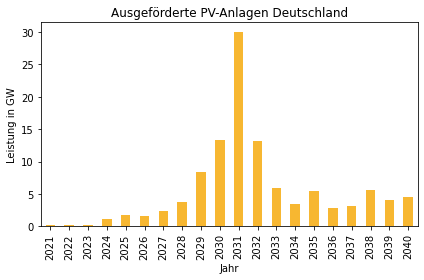

In [27]:
df_plot.plot.bar(stacked=True, color=['#f7b731', '#31f731', '#31b8f7'], legend=None)
plt.xlabel('Jahr')
plt.ylabel('Leistung in GW')
plt.title('Ausgeförderte PV-Anlagen Deutschland')
plt.tight_layout()
plt.savefig('Potenzial_MStR.png', dpi=300)

In [41]:
df_plot1 = pd.pivot_table(df_bestand, values='Nettonennleistung der Einheit', index='Jahr', columns='Energieträger', aggfunc='sum')

In [42]:
df_plot1 = df_plot1.drop('Wind', axis =1)

In [36]:
def siM(x):
    return x / 1000

In [ ]:
df_plot1['Solare Strahlungsenergie'] = df_plot1['Solare Strahlungsenergie'].apply(siM)

In [49]:
df_plot1 = df_plot1.dropna(subset=["Solare Strahlungsenergie"])

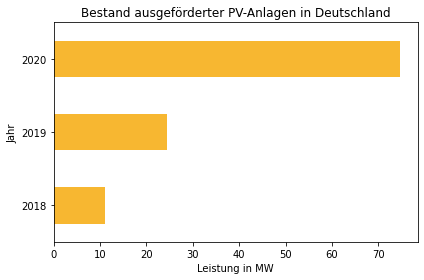

In [56]:
df_plot1.plot.barh(color=['#f7b731'], legend=None)
plt.ylabel('Jahr')
plt.xlabel('Leistung in MW')
plt.title('Bestand ausgeförderter PV-Anlagen in Deutschland')
plt.tight_layout()
plt.savefig('Bestand_MStR.png', dpi=300)